# Chapter 3: Polynomial Regression 📈

## Learning Objectives 🎯
After completing this chapter, you will be able to:
- Understand when linear regression isn't enough
- Work with polynomial regression for non-linear relationships
- Choose the right polynomial degree for your model
- Identify and prevent overfitting in polynomial models

This chapter takes your regression skills to the next level by handling more complex relationships in data!

In [ ]:
%reset
low_memory=False
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats
import math
import os
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Nothing done.


## 3.1 Introduction & Motivation

### When Linear Isn't Enough! 🚀

Remember how in the previous chapter we used linear regression to draw straight lines through our data? Well, real-world data isn't always that simple!

#### 🤔 Think About It:
- Does temperature always increase linearly throughout the day?
- Do plants grow at exactly the same rate every day?
- Does your learning progress follow a straight line?

The answer is usually "No"! Many real-world relationships are **non-linear**, meaning they can't be accurately represented by a straight line.

#### Enter Polynomial Regression! 🌟
Polynomial regression is like giving our model superpowers:
- Instead of just straight lines, we can create curves
- We can capture more complex patterns in data
- We can make better predictions for non-linear relationships

Think of it as upgrading from a ruler to a flexible curve - now we can fit more interesting shapes!

## 3.2 Problem Setting

### The Limitations of Linear Regression 🤔

Remember linear regression from Chapter 2? While it's powerful, it has one big limitation: it can only model straight-line relationships. But real life is rarely that simple!

#### When Linear Models Fall Short 📊
Think about these scenarios:
1. 🎢 **Roller Coaster Effect**: Some relationships go up and down
2. 🌱 **Growth Patterns**: Many things start slow, speed up, then plateau
3. 🔄 **Cyclical Patterns**: Some things repeat in cycles (like seasons)

#### Question 1: Real-World Non-Linear Examples 🌍
Can you think of relationships that definitely aren't linear? Give 3 examples and explain why.

Some examples to consider:
- 🎾 Height of a thrown ball over time
- 📈 Stock market prices
- 🌡️ Daily temperature changes

Think about what makes these relationships non-linear and why a straight line wouldn't work well to describe them.

In [ ]:
x = np.linspace(0, 3, 100) 
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))
X = x[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Let's make a scatterplot to illustrate the non-linearity of this dataset:

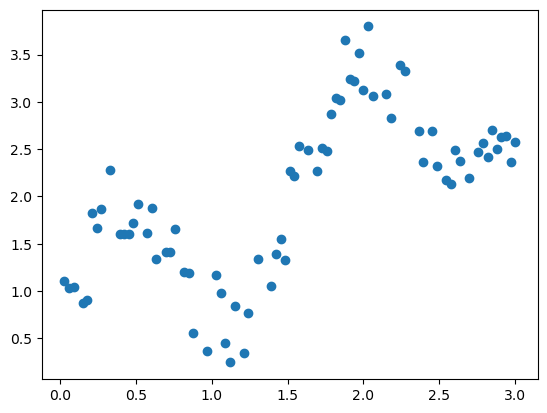

In [ ]:
plt.scatter(X_train, y_train)
plt.show()

### 🔍 Understanding Non-Linear Patterns

#### Question 2: Analyzing the Non-Linear Pattern
Look at the scatter plot above. Why isn't this data linear? 

Think about:
- 📈 Does Y consistently increase/decrease as X increases?
- 🔄 Do you see any repeating patterns?
- 📏 Could a straight line capture this pattern well?

#### Question 3: Testing Linear Regression
Let's try fitting a linear regression model to this data. Before we do:
- 🤔 What do you expect will happen?
- 📊 How well do you think it will perform?
- ❌ What limitations might we encounter?

After we fit the model, we'll:
1. Calculate evaluation metrics
2. Visualize the fit
3. Discuss why linear regression isn't suitable here

Remember: Sometimes seeing why something doesn't work helps us understand why we need a better solution!

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('The R2 score of the model on the train set is:', regressor.score(X_train, y_train))

print('The MAE of the model on the test set is:', mean_absolute_error(regressor.predict(X_test), y_test))
print('The MSE of the model on the test set is:', mean_squared_error(regressor.predict(X_test), y_test))

The R2 score of the model on the train set is: 0.415082394545103
The MAE of the model on the test set is: 0.7203963843057821
The MSE of the model on the test set is: 0.7043403658672862


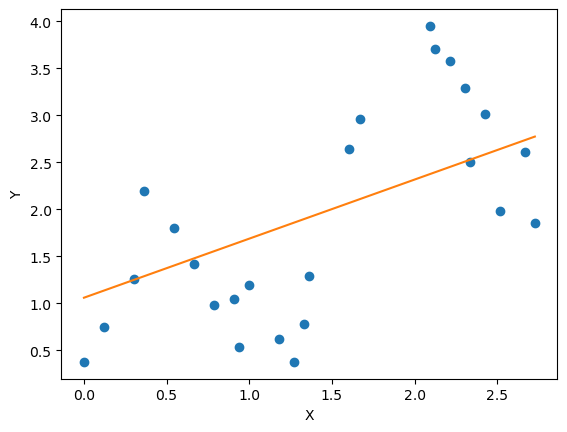

In [ ]:
min_pt = X_test.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X_test.max() * regressor.coef_[0] + regressor.intercept_
plt.plot(X_test, y_test, 'o')
plt.plot([X_test.min(), X_test.max()], [min_pt, max_pt])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

No, this model is not all that good. We have an $R^2$ of only 0.41, meaning only 41% of our data is explained by the model. Our model is linear while our data is not. The model is not adapting to predictable patterns of our data and is instead **underfitting**.

## 3.3 Model

### 3.3.1 Model

### Understanding Polynomial Regression 🎓

#### From Lines to Curves 📈
Based on the error and the context, here's the corrected version for the $SELECTION_PLACEHOLDER$:

While linear regression uses straight lines, polynomial regression can create curves! Here's the magic formula:

$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + ...$

Don't worry about memorizing this! Here's what you need to know:

#### 🔑 Key Concepts:
1. **Flexibility**: 
   - Linear regression = Only straight lines
   - Polynomial regression = Curves of different shapes

2. **Degree of the Polynomial**:
   - Degree 1 = Straight line (same as linear regression)
   - Degree 2 = Can make one curve (parabola)
   - Degree 3 = Can make two curves
   - And so on...

3. **The Magic Number (Hyperparameter)**:
   - This is the maximum degree we allow
   - Higher number = More flexible curve
   - But careful! Too high can lead to overfitting
   
Remember: More power isn't always better - we need to find the right balance! 🎯

### 3.3.2 Model Estimation

### Let's Build Our First Polynomial Model! 🛠️

Now comes the fun part - we'll create polynomial regression models with different degrees! 

#### 🎯 What We'll Do:
1. Start with degree 0 (super simple!)
2. See what happens
3. Then try different degrees to find the best fit

#### 🤔 Before We Start:
- What do you think degree 0 will look like?
- Will it be better or worse than linear regression?
- What might happen as we increase the degree?

Let's find out! 🚀

In [ ]:
model = LinearRegression()
pol_0 = PolynomialFeatures(degree=0)
model.fit(pol_0.fit_transform(X_train), y_train)

LinearRegression()

As you can see in the code, we've started off from a linear regression model and then "added" a polynomial part to it. The interested reader might compare the polynomial function with the linear function and remark why this is.

Let's draw the function we have fitted:

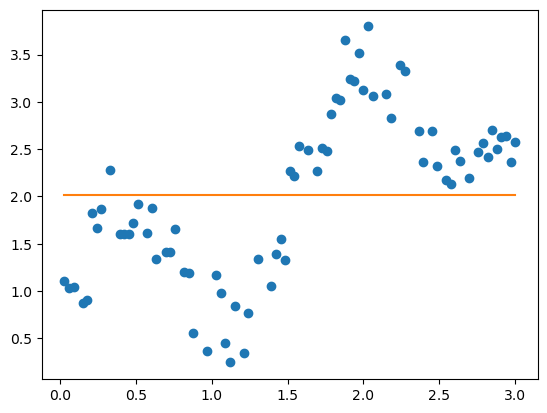

In [ ]:
x = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1,1) 
plt.plot(X_train, y_train, 'o')
plt.plot(x, model.predict(pol_0.fit_transform(x))) 
plt.show()

That's odd!! When our hyperparameter is equal to 0, our function is even worse than the linear regression function... 
Let's try and see what's going on, shall we?

##### Question 4: The code below provides a function combining all the steps in making a polynomial regression (creating the model, fitting the model, and plotting the model) while asking an input for the hyperparameter. Try and figure out which hyperparameter gives the best model. Why is this so? 

The R2 score of this model on the train set is: 0.9127806464713225


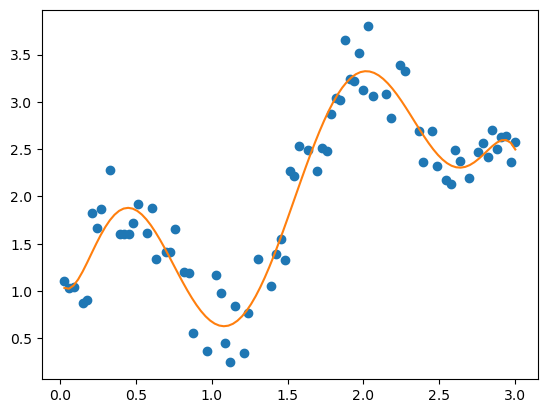

In [ ]:
def poly_test(x):
    pol_exp = PolynomialFeatures(degree=x)
    model = LinearRegression()
    model.fit(pol_exp.fit_transform(X_train), y_train)
    print('The R2 score of this model on the train set is:', model.score(pol_exp.fit_transform(X_train), y_train))
    x = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1,1) 
    plt.plot(X_train, y_train, 'o')
    plt.plot(x, model.predict(pol_exp.fit_transform(x))) 
    plt.show()
    
poly_test(7)    

Through trial and error we discover the ideal value for x is 17. However, when we draw this graph we see our model make weird jumps instead of a fluent motion. The model is adapting too drastically to fluctuations in the data. This is a clear indicator our model is **overfitting**.

A better x would most likely be around five. This is because the approximate function drawn through all datapoints is a function of the fifth degree.

In this case 'x' represents the degree of our function. An x of 1 would be a first-degree function. This is called a linear function, meaning that our base model of linear regression is a first-degree function. We can see this by passing '1' as a parameter to this function and comparing the drawn graph to the one of our linear function.

We know a function of the fifth degree would probably be best by visually looking at the data. While a first-degree  function always goes up or down, for each additional degree this changes. For example, a function of the second degree would go up and then down again. In this case our data goes up, down, up, down and up again. This means we have five "phases", and thus a function of the fifth degree.

## 3.4 Model Evaluation

### 📊 Evaluating Our Polynomial Models

Just like with linear regression, we need to check how well our polynomial models perform. But there's a twist - we need to be extra careful about overfitting!

#### Question 5: Comparing Model Performance 🔍

Let's analyze different polynomial degrees using our evaluation metrics:
1. **R² Score**: How well does the model fit the data?
2. **MAE**: Average size of our prediction errors
3. **MSE**: Average squared prediction errors

#### 🎯 What to Look For:
1. **Pattern in Scores**:
   - How do scores change as degree increases?
   - Is there a "sweet spot"?
   - When do scores start getting worse?

2. **Warning Signs**:
   - Very high R² (near 1.0) might mean overfitting
   - Big difference between training and test scores
   - Erratic behavior in higher degrees

3. **Finding Balance**:
   - Too simple = Underfitting
   - Too complex = Overfitting
   - Just right = Good generalization

Let's calculate these metrics and find our best model! 🚀

In [ ]:
for x in range(1, 41):
    pol_exp = PolynomialFeatures(degree=x)
    model = LinearRegression()
    model.fit(pol_exp.fit_transform(X_train), y_train)
    print('Evaluations for the model where x equals', x)
    print('\tThe R2 score of this model on the train set is:', model.score(pol_exp.fit_transform(X_test), y_test))
    print('\tThe MAE score of this model on the test set is:', mean_absolute_error(model.predict(pol_exp.fit_transform(X_test)), y_test))
    print('\tThe MSE score of this model on the test set is:', mean_squared_error(model.predict(pol_exp.fit_transform(X_test)), y_test))

Evaluations for the model where x equals 1
	The R2 score of this model on the train set is: 0.4256065278442831
	The MAE score of this model on the test set is: 0.5059707854231801
	The MSE score of this model on the test set is: 0.42124811667359646
Evaluations for the model where x equals 2
	The R2 score of this model on the train set is: 0.41249405129120575
	The MAE score of this model on the test set is: 0.5042700211888616
	The MSE score of this model on the test set is: 0.4308645317630303
Evaluations for the model where x equals 3
	The R2 score of this model on the train set is: 0.5243782668398063
	The MAE score of this model on the test set is: 0.5133332705047933
	The MSE score of this model on the test set is: 0.3488109963903763
Evaluations for the model where x equals 4
	The R2 score of this model on the train set is: 0.5718209473600289
	The MAE score of this model on the test set is: 0.4908275381569827
	The MSE score of this model on the test set is: 0.3140175302597707
Evaluation

### 📈 Analyzing Our Results

Looking at our evaluation metrics across different polynomial degrees, we can observe:

#### 1. Performance Patterns 🎯
- Best R², MAE, and MSE at degree 7
- Performance varies significantly with degree

#### 2. Making the Right Choice 🤔
While degree 7 gives the best metrics, we should consider:
- **Simplicity**: Lower degrees are easier to understand and maintain
- **Generalization**: Simpler models often work better on new data
- **Overfitting Risk**: Higher degrees might be "memorizing" the data

#### 3. Practical Recommendation 💡
- Choose degree 5-7 for this data
- Reasons:
  - Good performance metrics
  - Less risk of overfitting
  - Matches the visual pattern in the data
  - More likely to generalize well

Remember: The "best" metrics don't always mean the best model for real-world use! 🌍

## 3.5 Exercises

##### Question 1: See section 3.2

##### Question 2: See section 3.2

##### Question 3: See section 3.2

##### Question 4: See section 3.3.2

##### Question 5: See section 3.4

##### Question 6: In section 3.3.2 we created a function where wou could pass the factor of our function as a value called x. Finding the best value for x is an important task to get the best model possible. Taking into account what we learned last week, how would you find the ideal value for x to prevent overfitting?
A good approach would be to score each model using seperate testing data. Our models will have never seen this data before, so the ones who are overfitting will be the ones who will perform the worst. More generic models which are more balanced will have a better $R^2$ and MSE.

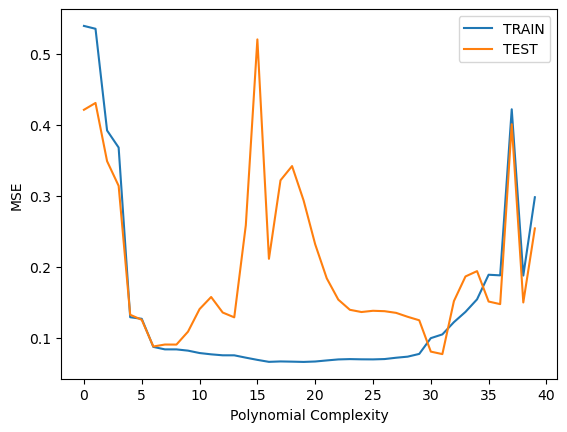

In [ ]:
train_mse_errors = []
test_mse_errors = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

for d in range(1,41):
    pol_exp = PolynomialFeatures(degree=d)
    model = LinearRegression(fit_intercept=True)
    model.fit(pol_exp.fit_transform(X_train),y_train)
    
    train_pred = model.predict(pol_exp.fit_transform(X_train))
    test_pred = model.predict(pol_exp.fit_transform(X_test))
    train_MSE = mean_squared_error(y_train,train_pred)
    test_MSE = mean_squared_error(y_test,test_pred)
    
    train_mse_errors.append(train_MSE)
    test_mse_errors.append(test_MSE)

plt.plot(train_mse_errors,label='TRAIN')
plt.plot(test_mse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("MSE")
plt.legend()
plt.show()

We can see that the MSE of the training data is consistently low between the degrees of 5 and 30. However, we can see something interesting when looking at the MSE of the testing data. We can see it gets rather bad after a degree of 8. This is because when using a degree higher than this our model starts to overfit. We see another good model with a degree of 30, however this is most likely due to random noise. When looking for a model that is not overfitting, it is usually better to pick the one with a lower degree. Let's zoom in on the area up to a degree of 8.

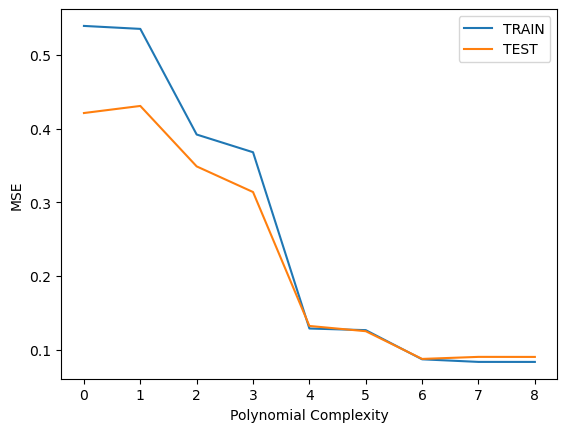

In [ ]:
plt.plot(train_mse_errors[:9],label='TRAIN')
plt.plot(test_mse_errors[:9],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("MSE")
plt.legend()
plt.show()

We see the MSE on the testing data is the lowest on 6. Does this mean the best model will have a degree of 6? **No!** Why is this?

We have only calculated models with a degree of one or higher. This means our first metric is for a degree of 1. However, due to the way computers work our plot displays this first metric at position 0! This means our metric of degree 2 is at postion 1, our metric of degree 3 is at position 2, ... and ultimately the metric on position 6 is that of a degree of 7!

We can thusconclude that the model with a degree of 7 will be the best one, as it scores the best on test data and is not overfitting.